/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


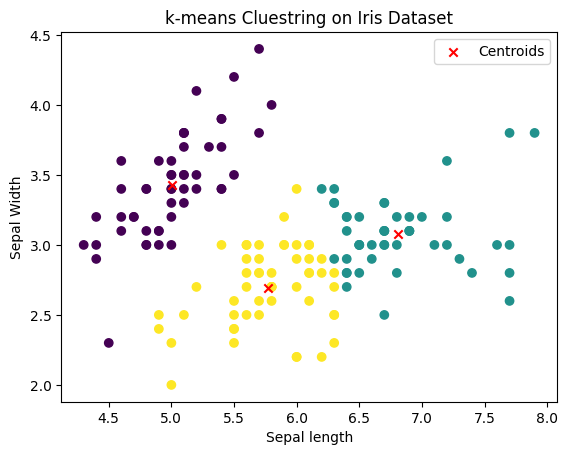

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

iris =load_iris()
x =iris.data[:,:2]

kmeans =KMeans(n_clusters=3,random_state=42)
kmeans.fit(x)

labels =kmeans.labels_
centroids = kmeans.cluster_centers_

plt.scatter(x[:, 0], x[:,1],c=labels)
plt.scatter(centroids[:,0],centroids[:,1],marker='x',color='red',label='Centroids')
plt.xlabel('Sepal length')
plt.ylabel('Sepal Width')
plt.title('k-means Cluestring on Iris Dataset')
plt.legend()

In [ ]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
print(type(iris))
print(list(iris.keys()))
X = iris["data"][:,3:] # petal width
y = (iris["target"] == 2).astype(np.int64) # 1 if Iris-Virginica, else 0
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X,y)

<class 'sklearn.utils._bunch.Bunch'>
['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


LogisticRegression(random_state=42)

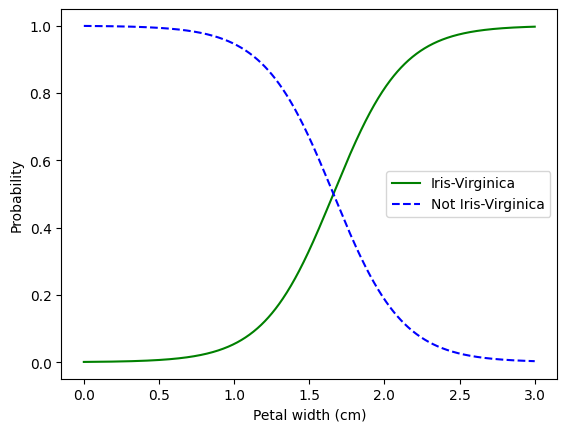

In [ ]:
import matplotlib.pyplot as plt

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1],"g-")
plt.plot(X_new, y_proba[:,0], "b--")
plt.xlabel('Petal width (cm)')
plt.ylabel('Probability')
plt.legend(['Iris-Virginica','Not Iris-Virginica'])

(100000, 2)


(2.9, 7.0, 0.8, 2.7)

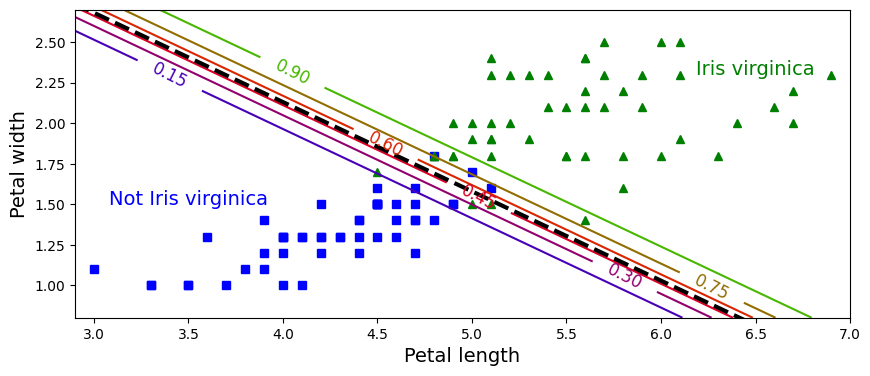

In [ ]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int64)

log_reg2 = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg2.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
print(X_new.shape)

y_proba = log_reg2.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg2.coef_[0][0] * left_right + log_reg2.intercept_[0]) / log_reg2.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])